<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/Unsupervised_learning_Clustering_on_Mall_customers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import necessary libraries***


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ***Data preprocessing***

In [ ]:
# Load the dataset
data =pd.read_csv('/content/Mall_Customers.csv')
print(data.head())




   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Drop customer ID, its just an identifier and not useful for clustering
data = data.drop('CustomerID', axis=1)

# Convert 'Gender' from text to numerical (Male: 1, Female: 0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# ***Select the features to be used for Clustering***

Kmeans Silhouette Score: 0.5546571631111091
Agglomerative Silhouette Score: 0.5538089226688662


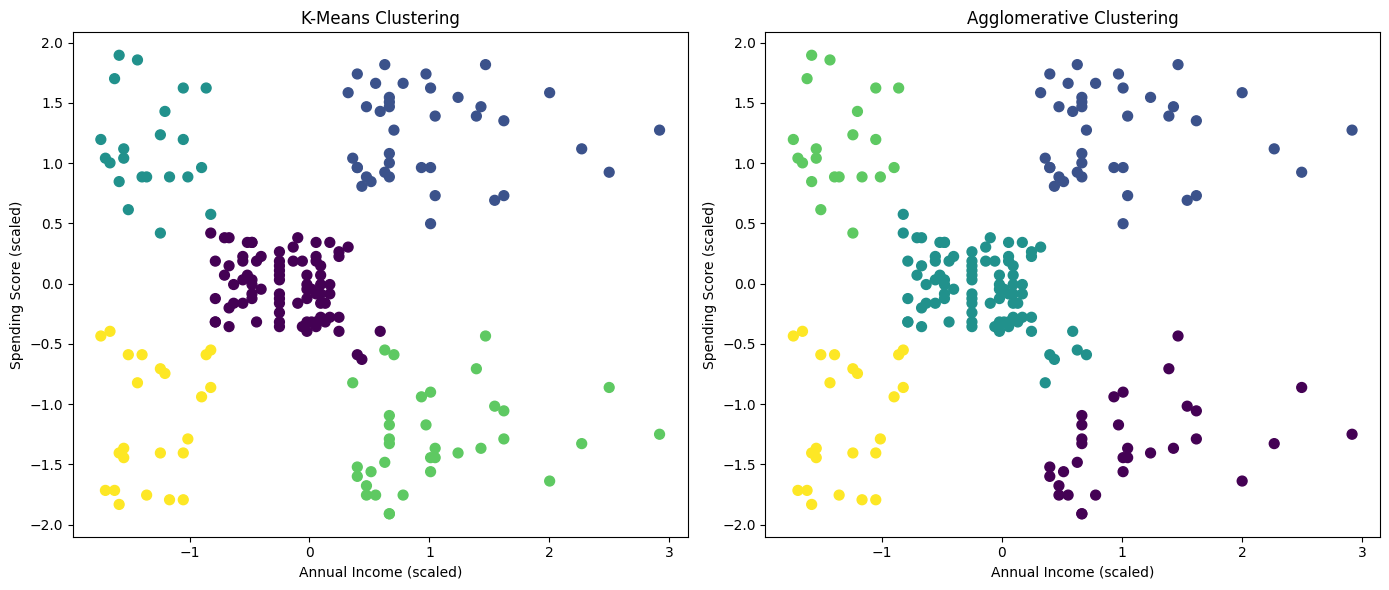

In [ ]:
# Select the features to be used for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X = StandardScaler().fit_transform(X)

# Apply Kmeans
Kmeans = KMeans(n_clusters=5, random_state=42)
Kmeans.fit(X)
Kmeans_silhouette = silhouette_score(X, Kmeans.labels_)

# Apply Agglomerative Clustering
Agglomerative = AgglomerativeClustering(n_clusters=5)
Agglomerative.fit(X)
Agglomerative_silhouette = silhouette_score(X, Agglomerative.labels_)

# Print the silhouette scores
print("Kmeans Silhouette Score:", Kmeans_silhouette)
print("Agglomerative Silhouette Score:", Agglomerative_silhouette)

# Plot the results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KMeans Plot
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=Kmeans.labels_, cmap='viridis', s=50)
ax1.set_title("K-Means Clustering")
ax1.set_xlabel("Annual Income (scaled)")
ax1.set_ylabel("Spending Score (scaled)")

# Agglomerative Clustering Plot
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=Agglomerative.labels_, cmap='viridis', s=50)
ax2.set_title("Agglomerative Clustering")
ax2.set_xlabel("Annual Income (scaled)")
ax2.set_ylabel("Spending Score (scaled)")

plt.tight_layout()
plt.show()



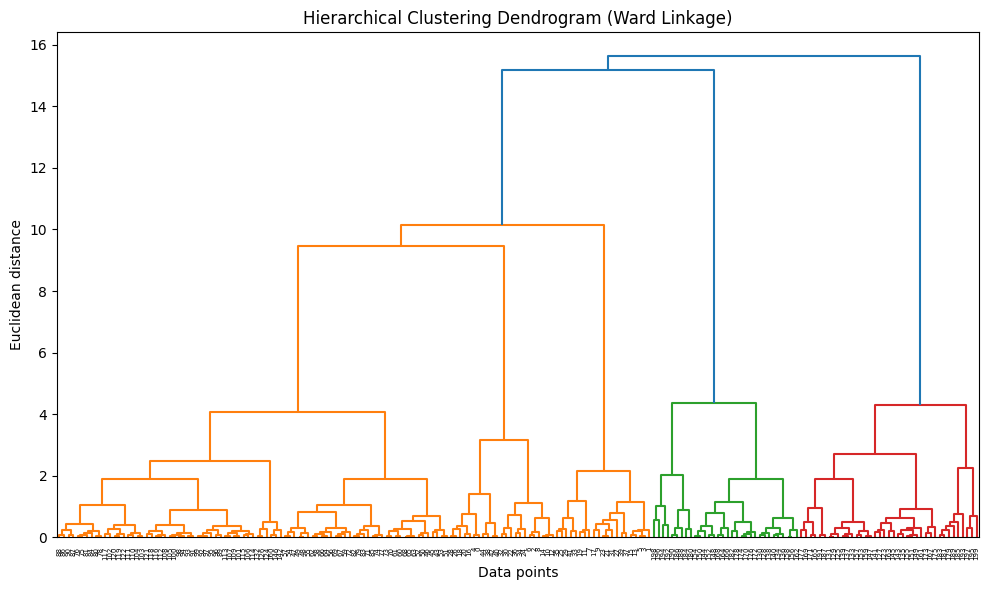

In [ ]:
# Plotting a hierarchical clustering dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.tight_layout()
plt.show()

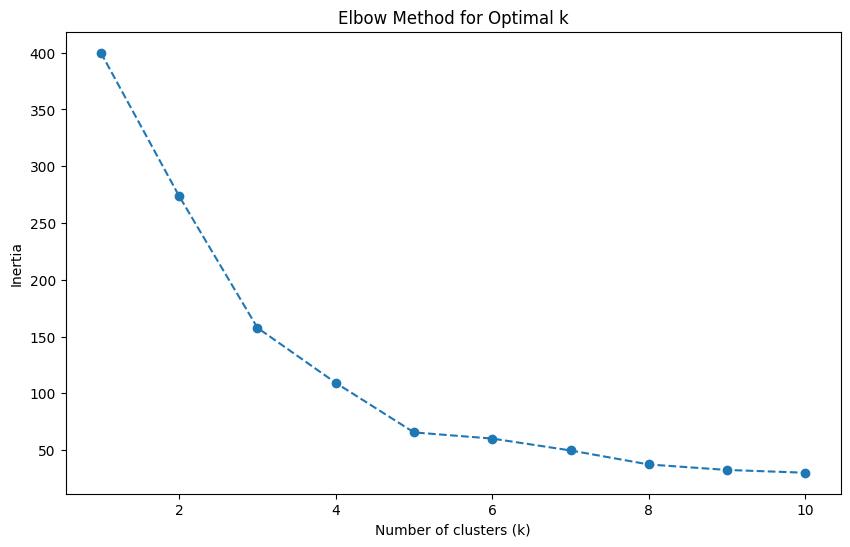

In [ ]:
# Plot the optimal k using the elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()
